# Audit Risk

## Veri Madenciliği Proje Ödevi

### Mehmet Furkan Şahin - 16011066

### NOT : Ekran çıktıları görünmezse projeye https://github.com/mfurkanns/data-mining-project adresinden ulaşabilirsiniz. Ayrıca dosya üzerindeki fotoğraflar görünmediği takdirde ' vm_Proje ' klasöründen bakabilirsiniz.

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Veri Analizi


Veri setinin amacı, mevcut ve geçmiş risk faktörleri göz önünde bulundurarak bir firmanın dolandırıcı olup olmadığını tahmin edebilecek bir sınıflandırma modeli oluşturmak ve denetçilere yardımcı olmaktır.

Bu araştırma çalışması, aynı zamanda Hindistan'daki devlet firmalarının dış denetçisi olan bir dış devlet denetim şirketinin bir vaka çalışmasıdır. Denetim planlaması sırasında, denetçiler farklı devlet dairelerinin işlerini inceler ve hedefi çok yüksek olan ve yanlış beyanların önemine sahip ofisleri ziyaret etmeyi hedefler. Bu, finansal raporlama hedefleriyle ilgili risk değerlendirilerek hesaplanır (Houston, Peters ve Pratt 1999). Çalışmanın üç temel amacı aşağıdaki gibidir:

1 - Denetim çalışanları ile derinlemesine görüşme yaparak şirketin denetim risk analizi iş akışını anlamak ve denetim planlaması sırasında firmaların risk değerlendirmesi için bir karar verme çerçevesi önermek.

2 - 776 hedef firma için Risk Denetim Puanını belirlemek için mevcut ve geçmiş risk faktörlerini incelemek, incelenen risk faktörlerini sıralamak için Parçacık Sürü Optimizasyonu (PSO) algoritmasını uygulamak ve aday gösterilen Risk Denetim Sınıfını (Dolandırıcılık ve Sahtekarlık Yok) değerlendirmektir.

3 - 776 hedef firma için Risk Denetim Puanını belirlemek için mevcut ve geçmiş risk faktörlerini incelemek, incelenen risk faktörlerini sıralamak için Parçacık Sürü Optimizasyonu (PSO) algoritmasını uygulamak ve aday gösterilen Risk Denetim Sınıfını (Dolandırıcılık ve Sahtekarlık Yok) değerlendirmek firmalar.

In [3]:
df = pd.read_csv('trial.csv')
df.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

Veriseti üzerindeki 18 adet özellik bulunmaktadır. Özelliklerin tanımı aşağıda verilmiştir.
<img src="vm_Proje/1.tablo.png">
<img src="vm_Proje/2.tablo.png">

#### Sınıf Sayısı
2 adettir. Bunlar riskli(1) ve riskli olmayan(0)

In [5]:
df['Risk'].value_counts()

1    486
0    290
Name: Risk, dtype: int64

#### Her sınıfa düşen örnek sayısı 
Riskli olmayan sınıf(0) : 290 adet

Riskli sınıf(1) : 486 adet

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CFB4774C8>]],
      dtype=object)

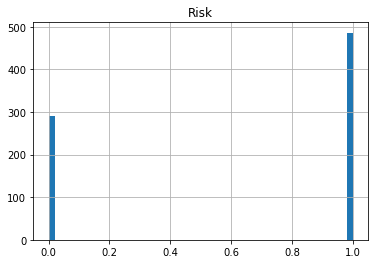

In [6]:
df.hist(column='Risk', bins=50)

### Feature Selection

Bu kısımda veriseti üzerinde etkili olan özellikler seçilecektir. Böylece Classification ve clustering kısımlarında daha etkili sonuçlar alabiliriz.

##### Correlation Matrix

Bu matris datasetti özelliklerin birbiriyle olan ilişkilerinin kuvvetini göstermektedir. Koyu renkli olan bölgelerdeki özellikler birbirleriyle kuvvetli ilişki içinde demektir. Datasetteki sınıf etiketi 'Risk' kolonudur. Bu kolonla en kuvvetli ilişki halinde olan kolonlar sırasıyla: 

1) Score_A (0.67)

2) Score (0.63)

3) Score_B (0.52)

4) Money_Marks (0.44)


Bu özelliklerin 'Information Gain' değeri yüksek çıkacaktır. İlerleyen bölümlerde hesaplanacaktır.

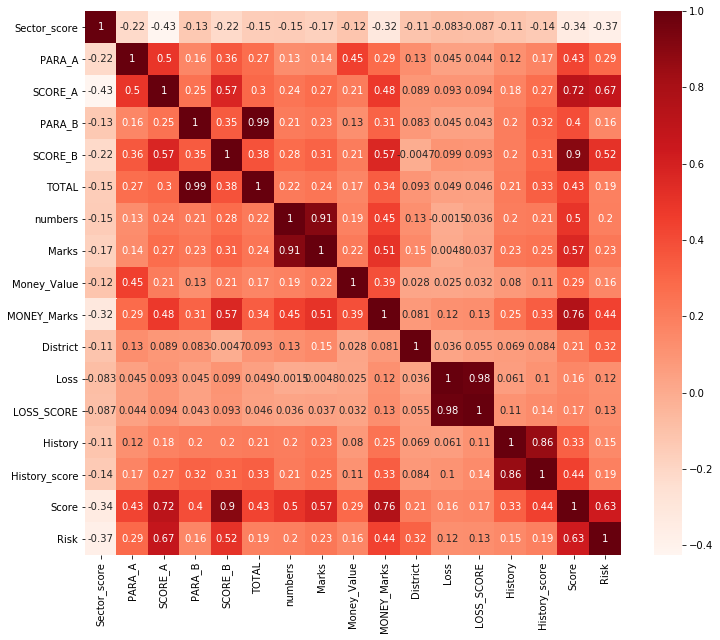

In [7]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


### Veri Temizleme

Burada veriseti daha etkili hale getirilecektir. Bu bağlamda verisetindeki eksik değerler değiştirilecek, gerçersiz değere sahip olan datalar geçerli olanlarla değiştirilecektir. Eksik değerler için her özelliğin kendi içerisinde ortalaması alınmış ve eksik olan yere yazılmıştır. Veriset içerisinde 'LOCATION_ID' kolonu numeric değerleri içermektedir. Ancak verisetindeki bazı sample'larda bu alan String değerlerle doldurulmuştur. Örneğin bazı sample'larda 'SAFIDON', 'LOHARU' ve 'NUH' gibi değerler mevcuttur. 'LOCATION_ID' kolonu classification ve clustering'de bizim işimize yaramayacak bir özelliktir. Bu yüzden bu özellik için String yazılan yerlere rastgele sayılar yazılacaktır. Nitekim ilerleyen kod parçalarında görüleceği üzere bu kolonun ayırt ediciliği ve 'Information Gain' değeri çok az olduğundan elenecek ve dikkate alınmayacaktır.

In [8]:
# String değerlerin sayılarla değiştirilmesi
mapping = {'SAFIDON': 1, 'LOHARU':0, 'NUH':2}
df = df.replace({'LOCATION_ID': mapping})

# Datasette eksik olan yerlerin ilgili kolonun ortalamasıyla doldurulması
df = df.fillna(df.mean())


# dataset ve class etiketlerinin alınması
X = df[['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score']]
y = df['Risk'].values




### Veriseti içindeki özelliklerin sınıflamada ki ayırt ediciliklerine göre sıralanması

###### Information Gain

Information Gain, bir veri kümesinin dönüştürülmesinden kaynaklanan entropideki azalmayı hesaplar. Hedef değişken bağlamında her değişkenin bilgi kazancını değerlendirerek özellik seçimi için kullanılabilir.

Aşağıda her bir özellik için information gain hesaplanmış ve ayırt edicilikleri belirlenmiştir. Grafikte görüleceği üzere ayırt ediciliği en fazla olan özellik 'Score' (0.66) olmuştur. Ayırt ediciliği 0.12'den az olan özellikler elenmiştir. Dolayısıyla clustering işlemi için Score, MONEY_Marks, MONEY_Marks, TOTAL, Score_B, Para_B, Score_A, Para_A özellikleri olmak üzere toplam 8 kolon kullanılacaktır. Geriye kalan özellikler elenmiştir.

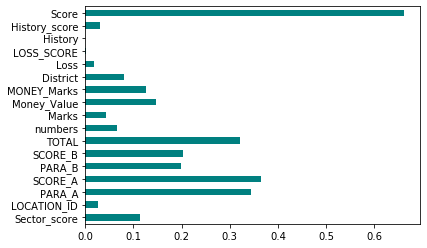

Sector_score     0.113808
LOCATION_ID      0.027444
PARA_A           0.344880
SCORE_A          0.365559
PARA_B           0.199105
SCORE_B          0.203333
TOTAL            0.321142
numbers          0.066736
Marks            0.042980
Money_Value      0.147622
MONEY_Marks      0.126561
District         0.080315
Loss             0.017369
LOSS_SCORE       0.001221
History          0.000000
History_score    0.031458
Score            0.661546
dtype: float64


In [9]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt


importances = mutual_info_classif(X,y, random_state=0)
f_importances = pd.Series(importances, X.columns[0:len(X.columns)])
f_importances.plot(kind='barh', color = 'teal')
plt.show()
print(f_importances)

In [10]:
names1 = ['PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'Money_Value', 'MONEY_Marks','Score','Risk']

#### Outlier Analysis

Bu bölümde outlier analizi yapılacaktır. Veri dağılımına aykırı olan değerler tespit edilip ayıklanacaktır. Bunun için 'Box Plot Analizi' yapılacaktır. Feature selection kısmından sonra belirlenen tüm feature'lar(names) üzerinde gerçekleştirilecektir. Outlier değerler atılmadan önce 776 adet sample mevcuttu. Outlier değerler ayıklandıktan sonra bu sayı 568'e düşmüştür

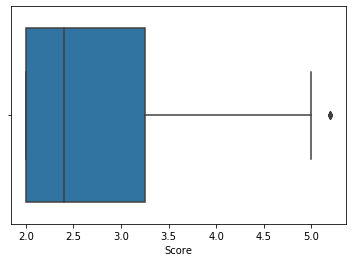

In [11]:
import seaborn as sns

sns.boxplot(x=df['Score'])

Outlier analizi için IQR kullanılmıştır. Belirlenen her özellik için, ilk olarak Q1 ve Q3 belirlenmiş daha sonra IQR bulunmuş ve 1.5IQR değerinden uzakta olan sample'lar elenmiştir. Bu işlem sonucunda 776 sample'dan 208 sample elenmiş ve geriye 568 tane kalmıştır.

In [12]:
a = df[names1]

Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_out = a[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_out.shape

PARA_A         2.27
SCORE_A        4.00
PARA_B         4.16
SCORE_B        2.00
TOTAL          7.17
Money_Value    5.63
MONEY_Marks    2.00
Score          1.25
Risk           1.00
dtype: float64


(568, 9)

## Verisetinin Ayrıntılı İncelenmesi

Bu kısımda veri seti ayrıntılı olarak incelenecektir. Ayırt ediciliği en yüksek olan 'Score' özelliğine baktığımızda verinin neden bu kadar ayırt edici olduğunu rahat bir şekilde görebiliyoruz. 776 tane sample'ın 'Score' özelliği dağılımı aşağıda verilmiştir. Burada dikkat çeken nokta 2.0 değerine sahip olan sample'lardır. 'Score' değeri 2 olan toplam 290 tane sample mevcuttur ve bu sample'ların tamamı 0.classa(Risksiz) aittir. 2 haricindeki sample'ların tamamı(486 tane) ise 1.classa(Riskli) aittir. 'Score' özelliği sayesinde veri çok keskin biçimde ayrışabilmektedir.

In [13]:
print('Score özelliğinin dağılımı:\nDeğer Sample Sayısı')
print(df['Score'].value_counts())
print('\n')
print('Score değeri 2 olan sample\'ların sınıf dağılımı :',df[df.Score == 2]['Risk'].value_counts())
print('Score değeri 2 olmayan sample\'ların sınıf dağılımı :',df[df.Score != 2]['Risk'].value_counts())
print('Toplam sample sayısı : ',len(df),'(290+486 = 776)')

Score özelliğinin dağılımı:
Değer Sample Sayısı
2.0    290
2.2     97
2.4     79
2.6     51
4.0     36
3.6     30
4.2     30
3.8     27
3.2     26
4.4     24
2.8     20
3.4     19
3.0     19
4.8     13
4.6      9
5.2      4
5.0      2
Name: Score, dtype: int64


Score değeri 2 olan sample'ların sınıf dağılımı : 0    290
Name: Risk, dtype: int64
Score değeri 2 olmayan sample'ların sınıf dağılımı : 1    486
Name: Risk, dtype: int64
Toplam sample sayısı :  776 (290+486 = 776)


In [14]:
names = ['PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B', 'TOTAL', 'Money_Value', 'MONEY_Marks','Score']

# Sınıflama

Bu kısımda 3 farklı algoritmadan yararlanılarak sınıflandırma yapılacaktır. Bunlar Naive Bayes, KNN ve Decision Tree'dir. Her bir algoritma için sınıflandırma yapılacak, başarı oranları karşılaştırılacak ve confusion matris'i incelenecektir.

### Datasetin Hazırlanması

Dataset train ve test set olmak üzere 2'ye bölünecektir. Datasetin %80'si train %20'si ise test set olarak kullanılacaktır.

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df_out = df_out.fillna(df_out.mean())

X = df_out[names]
y = df_out['Risk'].values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (454, 8) (454,)
Test set: (114, 8) (114,)


### 1) Naive Bayes

Sınıflandırma metodlarından ilki Naive Bayes olacaktır. Bu algoritmanın başarısı(%99) oldukça yüksektir. F1-score, precision ve recall değerleri aşağıda verilmiştir. Confusion matris'e bakıldığında sadece 1 tane sınıflandırmada hata çıkmıştır. Başarının bu kadar yüksek çıkmasının sebebi, Verisetinin Ayrıntılı İncelenmesi kısmında anlatıldığı üzere, verisetinin çok iyi ayrıştırıcılığa sahip kolonları olmasıdır.

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

clf = GaussianNB()
clf.fit(X_train, y_train)

yhat=(clf.predict(X_test))
acc_naive = metrics.accuracy_score(y_test, yhat)

print("Accuracy değeri : ", acc_naive)
print(metrics.classification_report(y_test,yhat))
print('Confusion Matrix\n',confusion_matrix(y_test, yhat))

Accuracy değeri :  0.9912280701754386
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.98      1.00      0.99        45

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Confusion Matrix
 [[68  1]
 [ 0 45]]


#### 5-fold Cross Validation

Dataset üzerinde 5-fold Cross Validation yapılmıştır. Sonuçlara bakıldığında, datasetin iyi olmasına bağlı olarak çok yüksek olduğu görülmektedir.

In [17]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores)

[1.         0.98901099 1.         1.         1.        ]


### 2) K - Nearest Neighbor Classifier

Sınıflandırma metodlarından ikincisi K - Nearest Neighbor olacaktır. Bu algoritmanın başarısı da oldukça yüksektir. F1-score, precision ve recall değerleri aşağıda verilmiştir. Confusion matris'e bakıldığında hiç hata çıkmamıştır. Başarının bu kadar yüksek çıkmasının sebebi, Verisetinin Ayrıntılı İncelenmesi kısmında anlatıldığı üzere, verisetinin çok iyi ayrıştırıcılığa sahip kolonları olmasıdır.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_knn = metrics.accuracy_score(y_test, y_pred)
print("Accuracy değeri: ", acc_knn)
print(classification_report(y_test, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))

Accuracy değeri:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        45

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Confusion Matrix
 [[69  0]
 [ 0 45]]


#### 5-fold Cross Validation

Dataset üzerinde 5-fold Cross Validation yapılmıştır. Sonuçlara bakıldığında, datasetin iyi olmasına bağlı olarak çok yüksek olduğu görülmektedir. En düşük değer 0.92, en yüksek değer 0.97 olmuştur.

In [19]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
print(scores)

[0.93406593 0.96703297 0.92307692 0.97802198 0.93333333]


#### Komşu Sayısının Başarıya Oranı

Bu kısımda KNN Algoritmasının başarısının komşu sayısına bağlı olarak değişimi incelenecektir. Komşu sayısı 1'den başlayıp 101'e kadar gitmektedir. Komşu sayısı ile başarı oranı ilişkisi grafikte gösterilmiştir. Grafiğe bakıldığında başarının en yüksek olduğu yer K=7,9,11 olduğu yerdir. En düşük olduğu yer ise K'nın 61 ve üzeri değer aldığı yerlerdir.

Text(0, 0.5, 'Accuracy')

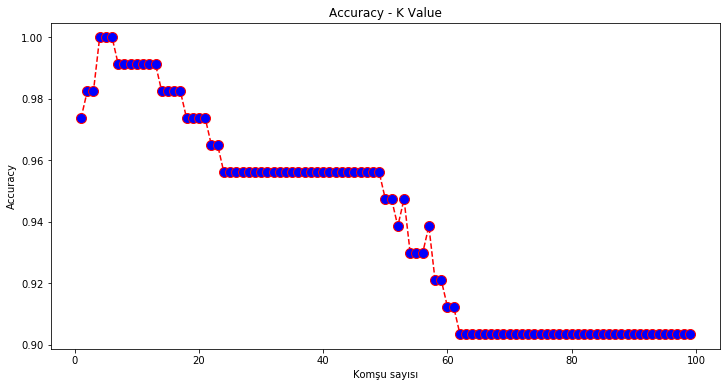

In [20]:
error = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i+2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(metrics.accuracy_score(y_test, pred_i))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy - K Value')
plt.xlabel('Komşu sayısı')
plt.ylabel('Accuracy')

### 3) Decision Tree

Son sınıflandırma algoritması ise Decision Tree'dir. Bu algoritmanın başarısı da oldukça yüksektir. F1-score, precision ve recall değerleri aşağıda verilmiştir. Confusion matris'e bakıldığında hiç hata çıkmamıştır. 

In [21]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(random_state=0)

tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

acc_dt = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",acc_dt)
print(classification_report(y_test, y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        45

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

Confusion Matrix
 [[69  0]
 [ 0 45]]


#### 5-fold Cross Validation
Dataset üzerinde 5-fold Cross Validation yapılmıştır. Sonuçlara bakıldığında, datasetin iyi olmasına bağlı olarak çok yüksek olduğu görülmektedir.

In [22]:
scores = cross_val_score(tree, X_train, y_train, cv=5)
print(scores)

[1. 1. 1. 1. 1.]


### Sonuç

Sınıflandırma için Naive Bayes, KNN ve Decision Tree olmak üzere 3 farklı algoritma kullanılmıştır. Algoritmaların başarısı oldukça yüksektir. 5-fold Cross Validation yapılarak da bu teyit edilmiştir. Sebebi ise verisetinde çok iyi özelliklerin bulunmasıdır. 3 algoritmada da başarı neredeyse yüzde 100 çıkmıştır. Bu imkansız gibi görünse de veriseti ayrıntılı şekilde incelendiğinde anlaşılmaktadır.

In [23]:
from tabulate import tabulate
print(tabulate(
    [['1','Naive Bayes', acc_naive*100],
     ['2','KNN', acc_knn*100],
     ['3','Decision Tree', acc_dt*100]
    ],
    headers=['#', 'Algoritma', 'Accuracy(%)']))

  #  Algoritma        Accuracy(%)
---  -------------  -------------
  1  Naive Bayes          99.1228
  2  KNN                 100
  3  Decision Tree       100


# Clustering

Bu kısımda 3 farklı algoritmadan yararlanılarak clustering yapılacaktır. Bunlar K Means, Hierarchical(Agglomerative) ve Mini Batch K Means'dir. Her bir algoritma için hem outlier analiz yapılmış data ile hem de tüm datalar ile clustering gerçekleştirilecektir. Her bir clustering yöntemi için başarı ölçülecek ve karşılaştırılacaktır.


## Data Hazırlama

Datanın tümü ve outler analizi yapılmış data hazırlanmıştır. Toplam 776 sample mevcuttur. Outlier Analizi ile bu sayı 568'e düşmektedir. 

In [24]:
from sklearn.metrics.cluster import homogeneity_score

X_tr_full = df[names]
y_full = df['Risk']

X_tr_out = df_out[names]
y_out = df_out['Risk']

print('Training data full :',X_tr_full.shape)
print('Training data label full :',y_full.shape)

print('Training data outlier analizi :',X_tr_out.shape)
print('Training data label outlier analizi :',y_out.shape)

Training data full : (776, 8)
Training data label full : (776,)
Training data outlier analizi : (568, 8)
Training data label outlier analizi : (568,)


### Purity Score

In [25]:
def purity(groundTruth, predicted):
    sifirLabel_0 = 0
    birLabel_0 = 0
    
    sifirLabel_1 = 0
    birLabel_1 = 0
    
    for i, val in enumerate(groundTruth):
      
        if(predicted[i] == 0):
            if(val == 0):
                sifirLabel_0 += 1
            else:
                birLabel_0 += 1
        else:
            if(val == 0):
                sifirLabel_1 += 1
            else:
                birLabel_1 += 1
            
            
    return max([sifirLabel_0,birLabel_0])/(sifirLabel_0+birLabel_0),max([sifirLabel_1,birLabel_1])/(sifirLabel_1+birLabel_1)

## 1) K Means Clustering

Clustering algoritmalarından ilki K Means'tir. Bu algoritmanın başarısı oldukça düşüktür.

###### 1- Datanın tamamının kullanılması durumunda clustering başarısı :

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=300)
kmeans.fit(X_tr_full)

y_kmeans = kmeans.predict(X_tr_full)

full_kmeans = metrics.accuracy_score(y_full, y_kmeans)
cls0_kmeans_full, cls1_kmeans_full = purity(y_full,y_kmeans)

print('Purity Cluster 0 : ',cls0_kmeans_full)
print('Purity Cluster 1 : ',cls1_kmeans_full)

Purity Cluster 0 :  0.6258064516129033
Purity Cluster 1 :  1.0


###### 2- Outlier analysis'dan sonra oluşan datanın kullanılması durumunda clustering başarısı : 

In [27]:
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=300)
kmeans.fit(X_tr_out)

y_kmeans = kmeans.predict(X_tr_out)


out_kmeans = metrics.accuracy_score(y_out, y_kmeans)

cls0_kmeans_out, cls1_kmeans_out = purity(y_out,y_kmeans)

print('Purity Cluster 0 : ',cls0_kmeans_out)
print('Purity Cluster 1 : ',cls1_kmeans_out)

Purity Cluster 0 :  0.5655577299412916
Purity Cluster 1 :  1.0


## 2) Hierarchical (Agglomerative) Clustering

Clustering algoritmalarından ikincisi Hierarchical'dir. Bu algoritma için Agglomerative clustering yapılacaktır. Agglomerative clustering'in 'Single', 'Complete' ve 'Average' olmak üzere 3 farklı şekli için clustering işlemi gerçekleştirilecektir. 

Hierarchical Clustering'in başarısı K Means'e göre düşük çıkmıştır.

#### 2.1 Complete Linkage

Complete Linkage ile kümeleme yapılırken maksimum uzaklık esas alınır. Sonuçları aşağıda verilmiştir. 

###### 2.1.1 Datanın tamamının kullanılması durumunda clustering başarısı :

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(X_tr_full)
y_pred = cluster.fit_predict(X_tr_full)

cls0_agg_com_full, cls1_agg_com_full = purity(y_full,y_pred)

print('Purity Cluster 0 : ',cls0_agg_com_full)
print('Purity Cluster 1 : ',cls1_agg_com_full)

Purity Cluster 0 :  0.6258064516129033
Purity Cluster 1 :  1.0


###### 2.1.2 Outlier analysis'dan sonra oluşan datanın kullanılması durumunda clustering başarısı : 

In [29]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(X_tr_out)
y_pred = cluster.fit_predict(X_tr_out)

cls0_agg_com_out, cls1_agg_com_out = purity(y_out,y_pred)

print('Purity Cluster 0 : ',cls0_agg_com_out)
print('Purity Cluster 1 : ',cls1_agg_com_out)

Purity Cluster 0 :  1.0
Purity Cluster 1 :  0.544256120527307


#### 2.2 Single Linkage

Complete Linkage ile kümeleme yapılırken minimum uzaklık esas alınır. Sonuçları aşağıda verilmiştir.

###### 2.2.1  Datanın tamamının kullanılması durumunda clustering başarısı :

In [30]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(X_tr_full)
y_pred = cluster.fit_predict(X_tr_full)

cls0_agg_sin_full, cls1_agg_sin_full = purity(y_full,y_pred)

print('Purity Cluster 0 : ',cls0_agg_sin_full)
print('Purity Cluster 1 : ',cls1_agg_sin_full)


Purity Cluster 0 :  0.6258064516129033
Purity Cluster 1 :  1.0


###### 2.2.2 Outlier analysis'dan sonra oluşan datanın kullanılması durumunda clustering başarısı :

In [31]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single').fit(X_tr_out)
y_pred = cluster.fit_predict(X_tr_out)


cls0_agg_sin_out, cls1_agg_sin_out = purity(y_out,y_pred)

print('Purity Cluster 0 : ',cls0_agg_sin_out)
print('Purity Cluster 1 : ',cls1_agg_sin_out)

Purity Cluster 0 :  0.5124113475177305
Purity Cluster 1 :  1.0


#### 2.3 Average Linkage

Complete Linkage ile kümeleme yapılırken ortalama uzaklık esas alınır. Sonuçları aşağıda verilmiştir.

###### 2.3.1  Datanın tamamının kullanılması durumunda clustering başarısı :

In [32]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
y_pred = cluster.fit_predict(X_tr_full)

cls0_agg_avg_full, cls1_agg_avg_full = purity(y_full,y_pred)

print('Purity Cluster 0 : ',cls0_agg_avg_full)
print('Purity Cluster 1 : ',cls1_agg_avg_full)

Purity Cluster 0 :  0.6258064516129033
Purity Cluster 1 :  1.0


###### 2.3.2  Outlier analysis'dan sonra oluşan datanın kullanılması durumunda clustering başarısı :

In [33]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
y_pred = cluster.fit_predict(X_tr_out)

cls0_agg_avg_out, cls1_agg_avg_out = purity(y_out,y_pred)

print('Purity Cluster 0 : ',cls0_agg_avg_out)
print('Purity Cluster 1 : ',cls1_agg_avg_out)

Purity Cluster 0 :  0.5293040293040293
Purity Cluster 1 :  1.0


## 3) Mini Batch K Means

Clustering algoritmalarının sonuncusu ie Mini Batch K Means'tir. Bu algoritmanın başarısı diğer clustering algoritmalarına göre yüksek çıkmıştır.

###### 3.1  Datanın tamamının kullanılması durumunda clustering başarısı :

In [34]:
from sklearn.cluster import MiniBatchKMeans

clustering = MiniBatchKMeans(n_clusters=2,random_state=0,batch_size=6).fit(X_tr_full)
labels = clustering.labels_

cls0_min_full, cls1_min_full = purity(y_full,labels)

print('Purity Cluster 0 : ',cls0_min_full)
print('Purity Cluster 1 : ',cls1_min_full)

Purity Cluster 0 :  0.5690936106983655
Purity Cluster 1 :  1.0


###### 3.2  Outlier analysis'dan sonra oluşan datanın kullanılması durumunda clustering başarısı : 

In [35]:
clustering = MiniBatchKMeans(n_clusters=2,random_state=0,batch_size=6).fit(X_tr_out)
labels = clustering.labels_

cls0_min_out, cls1_min_out = purity(y_out,labels)

print('Purity Cluster 0 : ',cls0_min_out)
print('Purity Cluster 1 : ',cls1_min_out)

Purity Cluster 0 :  0.5622568093385214
Purity Cluster 1 :  1.0


## 4) Spectral Clustering

##### 4.1 Datanın tamamının kullanılması durumunda clustering başarısı :

In [36]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans', random_state=0)
spre_pred = model.fit_predict(X_tr_full)

cls0_spec_full, cls1_spec_full = purity(y_full,spre_pred)

print('Purity Cluster 0 : ',cls0_spec_full)
print('Purity Cluster 1 : ',cls1_spec_full)

Purity Cluster 0 :  0.8520710059171598
Purity Cluster 1 :  0.9954337899543378


##### 4.2 Outlier analysis'dan sonra oluşan datanın kullanılması durumunda clustering başarısı : 

In [37]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans', random_state=0).fit(X_tr_out)
labelsS = model.fit_predict(X_tr_out)

cls0_spec_out, cls1_spec_out = purity(y_out,labelsS)

print('Purity Cluster 0 : ',cls0_spec_out)
print('Purity Cluster 1 : ',cls1_spec_out)

Purity Cluster 0 :  0.8525073746312685
Purity Cluster 1 :  1.0


## Sonuç

4 farklı algoritmanın sonucu aşağıdaki tabloda verilmiştir. Sonuçlara bakıldığında Outlier analizi yapılmış dataset üzerindeki accuracy değerleri daha düşük çıkmıtır. Algoritmaların başarılarına bakıldığında cluster'ların en yüksek purity değeri (0.85,1) ile 'Spectral Clustering' algoritmasına aittir. Ardından K means algoritması (0.63,1), daha sonra 'Agglomerative Clustering' (0.63,1) ve en son 'Mini Batch K Means' (0.57,1) gelmektedir. Spectral clustering'in en yüksek çıkmasının sebebi, çok değişkenli verilerin kümelenmesinde etkili olmasıdır. 

Hierarchical(Agglomerative) clustering algoritması 3 farklı şekilde gerçekleştirilmiştir. Bunlar Single, Complete ve Average Linkage'dir. Aralarındaki fark, noktaların seçilmesi sırasında minimum(single),maksimum(complete) ve ortalama(average) uzaklığa bakılmasıdır. Bu algoritmaların purity değerlerine bakacak olursak, full dataset'te aynı çıkmıştır. Outlier analizden geçmiş olan datasette ise en yüksek başarı (1,0.54) ile 'Complete Linkage'e aittir. Daha sonra (0.53,1) ile 'Average Linkage' ve en son (0.51,1) ile 'Single Linkage' yer almaktadır.  

In [38]:
from tabulate import tabulate
print(tabulate(
    [['1','K Means',(round(cls0_kmeans_full,2),round(cls1_kmeans_full,2)),(round(cls0_kmeans_out,2),cls1_kmeans_out)], 
     ['2.1','Agglomerative(Single Linkage)',(round(cls0_agg_sin_full,2),round(cls1_agg_sin_full,2)),(round(cls0_agg_sin_out,2),cls1_agg_sin_out)],
     ['2.2','Agglomerative(Complete Linkage)',(round(cls0_agg_com_full,2),cls1_agg_com_full),(cls0_agg_com_out,round(cls1_agg_com_out,2))],
     ['2.3','Agglomerative(Average Linkage)',(round(cls0_agg_avg_full,2),cls1_agg_avg_full),(round(cls0_agg_avg_out,2),cls1_agg_avg_out)],
     ['3','Mini Batch K Means',(round(cls0_min_full,2),cls1_min_full),(round(cls0_min_out,2),cls1_min_out)],
     ['4','Spectral Clustering',(round(cls0_spec_full,2),round(cls1_spec_full,2)),(round(cls0_spec_out,2),round(cls1_spec_out,2))]
    ],
    headers=['#', 'Algoritma', 'Full Dataset(%)', 'Outlier Analizi Yapılmış Dataset(%)']))

  #  Algoritma                        Full Dataset(%)    Outlier Analizi Yapılmış Dataset(%)
---  -------------------------------  -----------------  -------------------------------------
1    K Means                          (0.63, 1.0)        (0.57, 1.0)
2.1  Agglomerative(Single Linkage)    (0.63, 1.0)        (0.51, 1.0)
2.2  Agglomerative(Complete Linkage)  (0.63, 1.0)        (1.0, 0.54)
2.3  Agglomerative(Average Linkage)   (0.63, 1.0)        (0.53, 1.0)
3    Mini Batch K Means               (0.57, 1.0)        (0.56, 1.0)
4    Spectral Clustering              (0.85, 1.0)        (0.85, 1.0)
